<a href="https://colab.research.google.com/github/dangnha/tensorflow/blob/master/Neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Nerworks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number

In [21]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.12.0'

## Creating data to view a fit

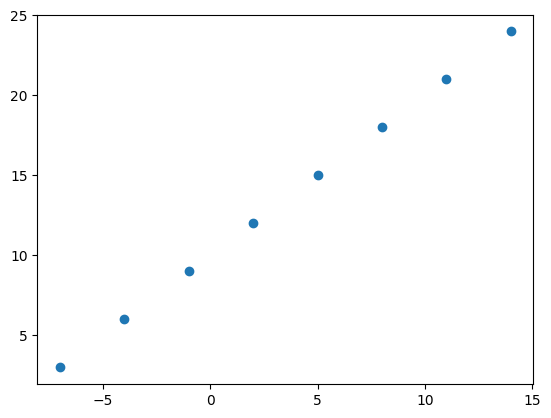

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,Y)

## Input and output shapes

In [23]:
# Creare a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [82]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [83]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [84]:
X = tf.reshape(X, (X.shape[0], 1))
Y = tf.reshape(Y, (Y.shape[0], 1))
X, Y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [85]:
X = tf.cast(X, dtype=tf.float32)
Y = tf.cast(Y, dtype=tf.float32)

## Step in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layer of a deep learning model
2. **Compliting a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns berween x & y (features and labels)

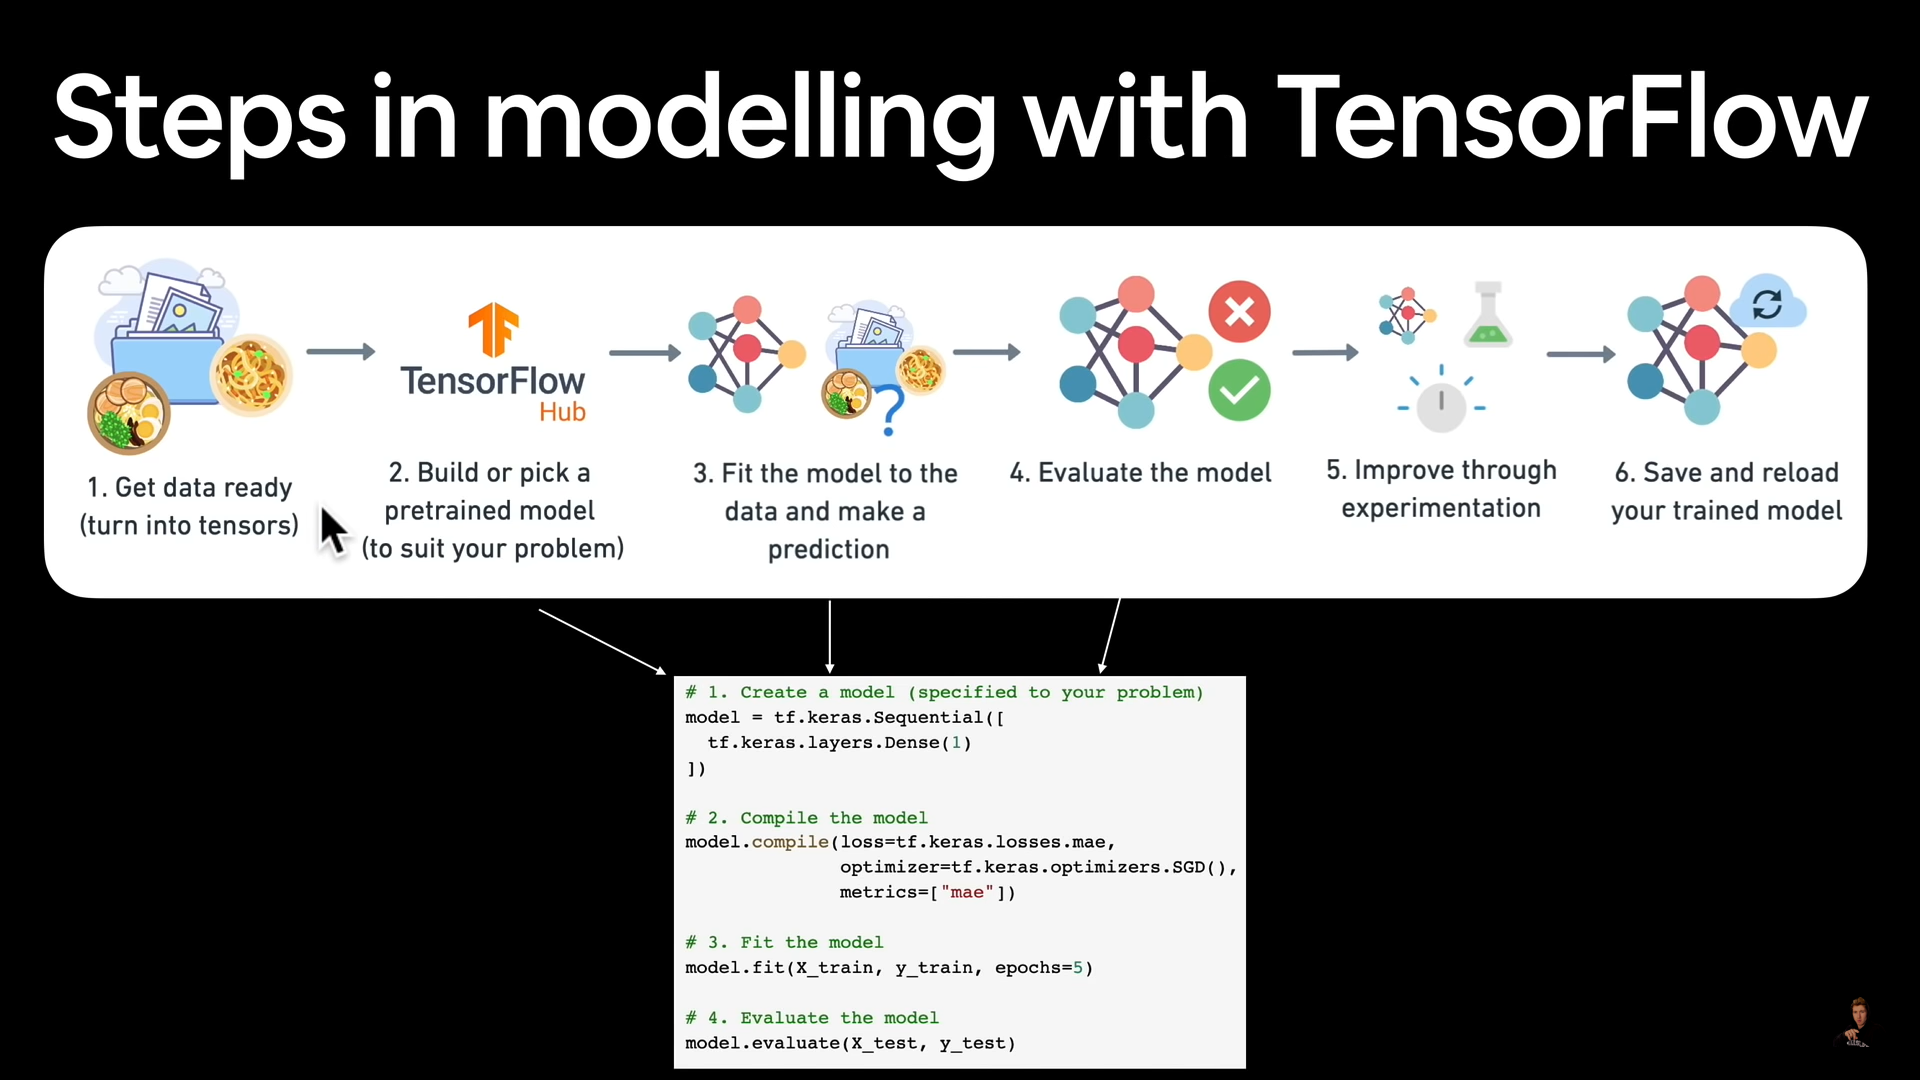

In [101]:
# Set random seed 
tf.random.set_seed(42)

# Original and improving version:

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    #Improving
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    # -----------------
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              # optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), # Improving
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs= 100) # Old version is 5


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.3041 - mae: 14.3041
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.9513 - mae: 13.9513
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.6242 - mae: 13.6242
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3145 - mae: 13.3145
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 13.0535 - mae: 13.0535
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8024 - mae: 12.8024
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 12.5548 - mae: 12.5548
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 12.3155 - mae: 12.3155
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0742 - mae: 12.0742
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8288 - mae: 11.8288
Epoch 11/100
1/1 [==============================] -

In [97]:
# Check out x and y
X,Y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [106]:
# Try and make prediction  using our model
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[30.84882]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - ever we might add more layers. increase the numder of hidden units (all called neurons) within each of the hidden layers, change the actvation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more example to learn from).

In [103]:
model.evaluate([7.0], [17.0])

1/1 [==============================] - 0s 148ms/step - loss: 2.8361 - mae: 2.8361


[2.8360633850097656, 2.8360633850097656]

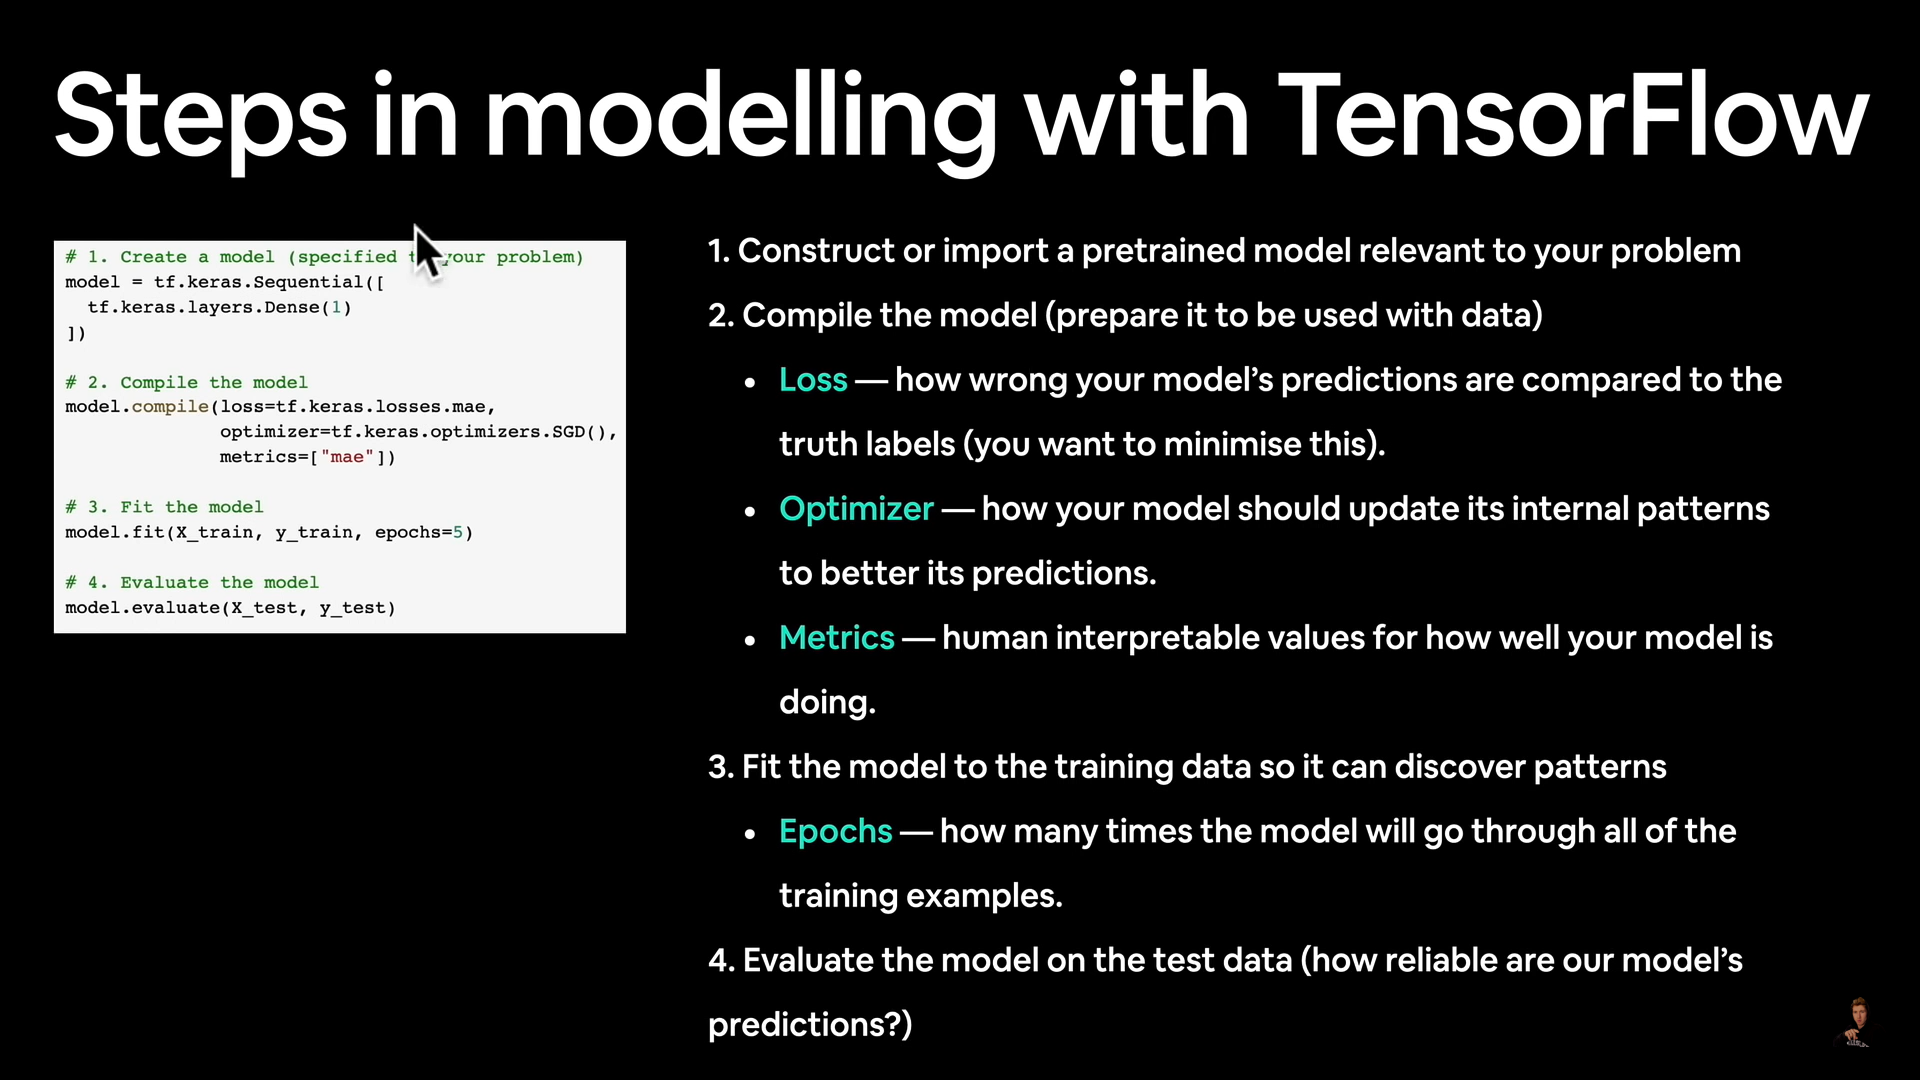